In [1]:
import pandas as pd
import regex as re
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import emoji
 
lemmatizer = WordNetLemmatizer()


data = pd.read_csv('../data/instagram/instagram_posts_from_eredivsie_players.csv', sep='|', quotechar='"', engine='python')
trends_data = pd.read_csv('../data/google-trends/def_nl_football_google_trends.csv', sep=';', index_col=0)
trends_data.index = pd.to_datetime(trends_data.index)

data = data.dropna(subset=['caption'])

In [2]:
# 5. Text Preprocessing
stop_words = set(stopwords.words('english'))

def extract_hashtags(text):
    return [word for word in text.split() if word.startswith('#')]

def extract_emoijs(text):
    return [word for word in text.split() if word.startswith(':') and word.endswith(':')]

def preprocess_text(text):
    pattern = re.compile(r'[^a-zA-Z]')
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # # Remove punctuation, numbers, and specific characters
    # tokens = [re.sub(r'[^a-zA-Z]', '', token) for token in tokens]
    
    # # Filter out empty tokens
    # tokens = [token for token in tokens if token]
    
    # # Lowercasing, lemmatization, and character removal
    # tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words]
    tokens = [lemmatizer.lemmatize(pattern.sub('', token).lower()) for token in tokens if pattern.sub('', token) and token.lower() not in stop_words]
    
    return tokens

def extract_authors(text):
    """Extract authors based on a defined pattern."""
    # Regular expression pattern
    pattern = r'(written by [A-Z][a-z]+ [A-Z][a-z]+|By [A-Z][a-z]+ [A-Z][a-z]+|written by [A-Za-z]+|[A-Z][a-z]+ com |[a-z]+ com(?= ))'
    matches = re.findall(pattern, text)
    
    # If multiple authors, join with comma or just return the single author
    return ', '.join(matches) if matches else None

def contains_numbers(text):
    return bool(re.search(r'\d', text))

def contains_match_reference(text):
    return bool(re.search(r"#\b[A-Z]{3}[A-Z]{3}\b", text))

In [35]:
data['caption'] = data['caption'].apply(str)
data['caption'] = data['caption'].apply(emoji.demojize)

In [ ]:
data['contains_numbers'] = data['caption'].apply(contains_numbers)
data['contains_match_ref'] = data['caption'].apply(contains_match_reference)

data['hashtags'] = data['caption'].apply(extract_hashtags)
data['emojis'] = data['caption'].apply(extract_emoijs)
data['description_preprocessed'] = data['caption'].apply(preprocess_text)
data['post_datetime'] = pd.to_datetime(data['timestamp'])

In [20]:
data

,caption,ownerUsername,timestamp,likesCount,commentsCount,contains_numbers,contains_match_ref,hashtags,emojis,description_preprocessed,amount_of_words,Post Count
post_datetime,,,,,,,,,,,,
2011-12-20 18:50:56+00:00,Baby tree with a Cone-er,zachboothdorff,2011-12-20T18:50:56.000Z,7.0,0.0,False,False,[],[],"[baby, tree, with, a, coneer]",5,NaN
2011-12-24 22:51:40+00:00,Me and Bonham,zachboothdorff,2011-12-24T22:51:40.000Z,77.0,3.0,False,False,[],[],"[and, bonham]",2,NaN
2011-12-26 21:21:17+00:00,Heading home!,zachboothdorff,2011-12-26T21:21:17.000Z,6.0,0.0,False,False,[],[],"[heading, home]",2,NaN
2012-01-11 19:00:52+00:00,Seattle is space-ious,zachboothdorff,2012-01-11T19:00:52.000Z,5.0,0.0,False,False,[],[],"[seattle, spaceious]",2,NaN
2012-01-13 01:09:47+00:00,Gasworks!,zachboothdorff,2012-01-13T01:09:47.000Z,5.0,0.0,False,False,[],[],[gasworks],1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-29 21:54:05+00:00,Hilla mín 20 í dag! Elska þig:red_heart:,kristianhlynsson,2024-05-29T21:54:05.000Z,2583.0,18.0,True,False,[],[],"[hilla, mn, dag, elska, ig, redheart]",6,NaN
2024-05-29 23:46:40+00:00,"On this day in 1955, James Dean attended the S...",jamesdean,2024-05-29T23:46:40.000Z,6304.0,95.0,True,False,"[#jamesdean, #santabarbara, #vintageracing]",[],"[on, this, day, james, dean, attended, the, sa...",63,NaN
2024-05-30 01:20:49+00:00,ポルシェスタジオ銀座に行ってきました！\n\n#EBI GROUP が運営する #ポルシェス...,yukinarisugawara,2024-05-30T01:20:49.000Z,5652.0,16.0,False,False,"[#EBI, #ポルシェスタジオ銀座, #久保建英]",[],"[ebi, group, porschestudioginza, ebigroup]",4,NaN


# Descriptives

In [12]:
import matplotlib.pyplot as plt

data['amount_of_words'] = data['description_preprocessed'].apply(len)
non_empty_description = data[data['amount_of_words'] > 0]

## Social Media Data

### Amount of posts analysed

In [13]:
print(f'Non empty: {len(non_empty_description)}')

print(f'Whole dataset: {len(data)}')

Non empty: 29202
Whole dataset: 29432


### Avg amount of words per post

In [14]:
non_empty_description['amount_of_words'].mean()

15.641805355797548

### Amount of posts containing numbers

In [15]:
len(non_empty_description[non_empty_description['contains_numbers'] == True])

8121

### Amount of match references

In [16]:
len(non_empty_description[non_empty_description['contains_match_ref'] == True])

501

### Over time increase of data

In [17]:
data.set_index('post_datetime', inplace=True)
data.sort_index(inplace=True)

#### Followers

In [18]:
# Plotting
plt.figure(figsize=(10, 5))  # Set the figure size (width, height in inches)
plt.plot(data.index, data['Followers at Posting'], linestyle='-')
plt.plot(data.index, data['Total Interactions'], linestyle='--')
plt.title('Followers Increase Over Time')  # Add a title
plt.xlabel('Date')  # Label for the X-axis
plt.ylabel('Followers at Posting')  # Label for the Y-axis
plt.grid(True)  # Turn on the grid lines
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust subplots to give some padding
plt.show()

KeyError: 'Followers at Posting'

<Figure size 1000x500 with 0 Axes>

#### Frequency

In [19]:
# Assuming 'followers_at_posting' is part of your DataFrame
data['Post Count'] = data.resample('M').size()
df_daily = data.resample('M').agg({'Post Count': 'size', 'Followers at Posting': 'mean'})

# Plotting with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()
line1, = ax1.plot(df_daily.index, df_daily['Post Count'], 'g-', label='Posts per Month')
line2, = ax2.plot(df_daily.index, df_daily['Followers at Posting'], 'b-', label='Average Followers at Posting')

ax1.set_xlabel('Date')
ax1.set_ylabel('Posts per Month', color='g')
ax2.set_ylabel('Average Followers at Posting', color='b')
ax1.set_title('Posting Frequency and Followers Over Time')
ax1.grid(True)

lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')  # Positioning the legend on the left (default position)
plt.show()


/var/folders/t0/f1kbfy_n4433_n3x1c7px_hr0000gn/T/ipykernel_74905/2447752998.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['Post Count'] = data.resample('M').size()
/var/folders/t0/f1kbfy_n4433_n3x1c7px_hr0000gn/T/ipykernel_74905/2447752998.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_daily = data.resample('M').agg({'Post Count': 'size', 'Followers at Posting': 'mean'})


KeyError: "Column(s) ['Followers at Posting'] do not exist"

## Google trends

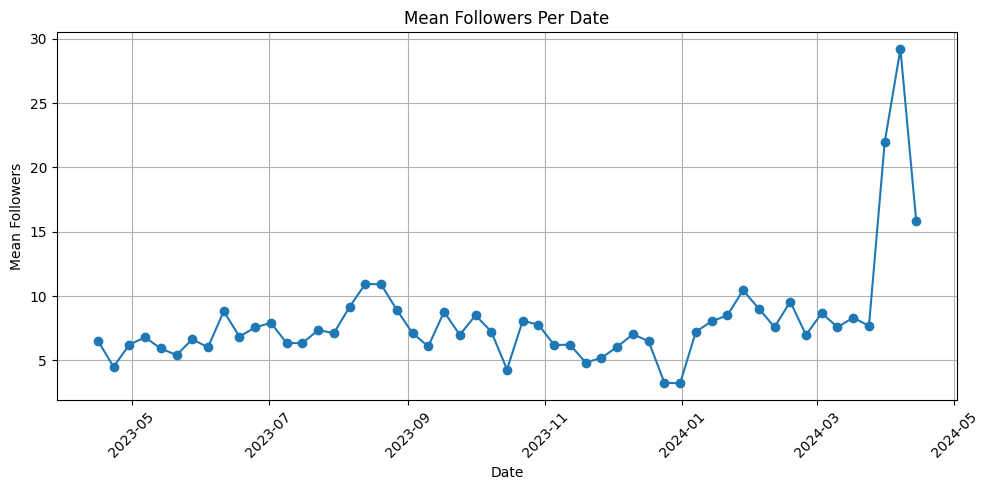

In [94]:
trends_data['mean_followers_per_date'] = trends_data.iloc[:, 1:].mean(axis=1)

plt.figure(figsize=(10, 5))
plt.plot(trends_data.index, trends_data['mean_followers_per_date'], marker='o', linestyle='-')
plt.title('Mean Followers Per Date')
plt.xlabel('Date')
plt.ylabel('Mean Followers')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Modelling

In [ ]:
# Create and fit BERTopic model
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probabilities = topic_model.fit_transform(data['Cleaned_Description'])

# Get and display the topic info
topic_info = topic_model.get_topic_info()

# Data transformation into per-week basis

In [7]:
import pandas as pd

df_social = pd.read_excel('../data/instagram/Lutsharel Geertruida - Instagram - Content.xlsx')

In [8]:
df_social['Post Created DateTime'] = pd.to_datetime(df_social['Post Created Date'] + ' ' + df_social['Post Created Time'])

# Extract the week number as 'YearWeek' for grouping data by weeks
df_social['YearWeek'] = df_social['Post Created DateTime'].dt.strftime('%Y-%U')

# Optionally drop the now redundant date and time columns if they are no longer needed
df_social.drop(['Post Created Date', 'Post Created Time'], axis=1, inplace=True)


In [10]:
weekly_data = df_social.groupby(['Account', 'YearWeek']).agg({
    'Followers at Posting': 'last',  # Assuming you want the last recorded followers count for the week
    'Total Interactions': 'sum',
    'Likes': 'sum',
    'Comments': 'sum',
    'Views': 'sum'
}).reset_index()
weekly_data

,Account,YearWeek,Followers at Posting,Total Interactions,Likes,Comments,Views
0,Lutsharel Geertruida,2019-14,11860,2730,2630,100,0
1,Lutsharel Geertruida,2019-17,12078,3241,3093,148,0
2,Lutsharel Geertruida,2019-19,12296,3084,2939,145,0
3,Lutsharel Geertruida,2019-26,12919,2937,2807,130,0
4,Lutsharel Geertruida,2019-32,13901,3171,3035,136,0
...,...,...,...,...,...,...,...
135,Lutsharel Geertruida,2024-09,101522,18635,18469,166,0
136,Lutsharel Geertruida,2024-10,101966,9346,9287,59,0
137,Lutsharel Geertruida,2024-11,102104,59696,59331,365,0
138,Lutsharel Geertruida,2024-12,104176,10843,10717,126,0
